<a href="https://colab.research.google.com/github/tobyzawthuhtet/GIS_codes/blob/main/Optimal_K_values_for_Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyrsgis

In [2]:
import tifffile as tfl
import numpy as np
import matplotlib.pyplot as plt 
import os 
import sklearn
from sklearn.cluster import KMeans
from pyrsgis.convert import changeDimension,array_to_table,table_to_array
from scipy.spatial.distance import cdist
from PIL import Image


256
(400, 400, 3)


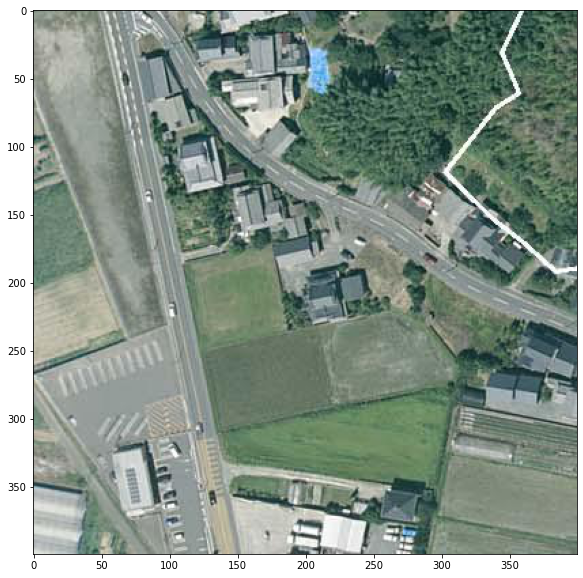

In [47]:
data = np.asarray((Image.open(('/content/04347_original.jpg'))))
plt.figure(figsize=(10,10))
plt.imshow(data)
print(len(np.unique(data)))
print(data.shape)
x=data.shape[0]
y=data.shape[1]
z=data.shape[2]

In [51]:
data1 =np.moveaxis(data,-1,0)
print(data1.shape)
data_scaled = array_to_table(data1)
print(data_scaled.shape)

(3, 400, 400)
(160000, 3)


In [52]:
print(data_scaled)

[[110 122 110]
 [114 126 114]
 [119 131 119]
 ...
 [100 112 100]
 [104 116 104]
 [110 122 110]]


In [53]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_scaled)
    #distortions.append(kmeanModel.inertia_)
    #inertias.append(kmeanModel.inertia_)
    distortions.append(sum(np.min(cdist(data_scaled, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / data_scaled.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(data_scaled, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / data_scaled.shape[0]
    mapping2[k] = kmeanModel.inertia_
    


In [54]:
print("Distortions Values")
for key, val in mapping1.items():
    print(f'{key} : {val}')
    
print("------------")
print("Inertia Values")
for key, val in mapping2.items():
    print(f'{key} : {val}')

Distortions Values
1 : 58.309994302043144
2 : 36.93842867166083
3 : 27.483470947321027
4 : 21.803906978595933
5 : 19.115043475711737
6 : 16.855519889915712
7 : 14.66843763780813
8 : 13.542597861065477
9 : 12.70942217065995
10 : 11.923664759684916
11 : 11.372320446085325
12 : 10.796671041476346
13 : 10.382205617319732
14 : 10.286961674560096
------------
Inertia Values
1 : 837041702.1836817
2 : 320422310.06728417
3 : 172664427.90841973
4 : 105374566.97959957
5 : 77921225.83502945
6 : 57420685.56048703
7 : 44757345.56865808
8 : 38060848.22559231
9 : 32999047.18880911
10 : 29017974.946290597
11 : 26340302.84103883
12 : 24216263.818157498
13 : 22415145.769039944
14 : 20568319.68864578


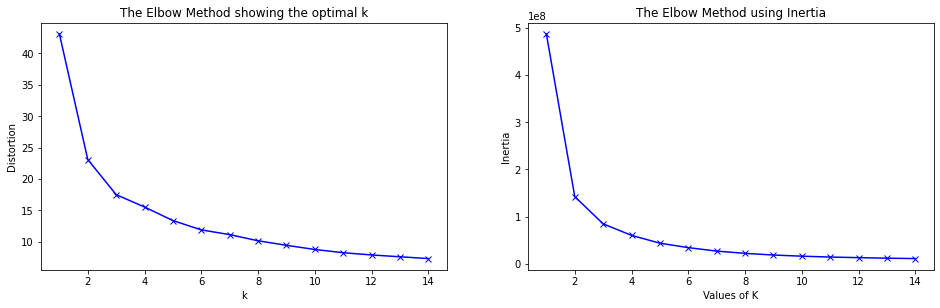

In [32]:
plt.figure(figsize=(16,10))
plt.subplot(221)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

plt.subplot(222)
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [55]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(data_scaled)
kmeanModel.predict(data_scaled)
out_data = kmeanModel.labels_.reshape((x,y))
print(out_data.shape)

(400, 400)


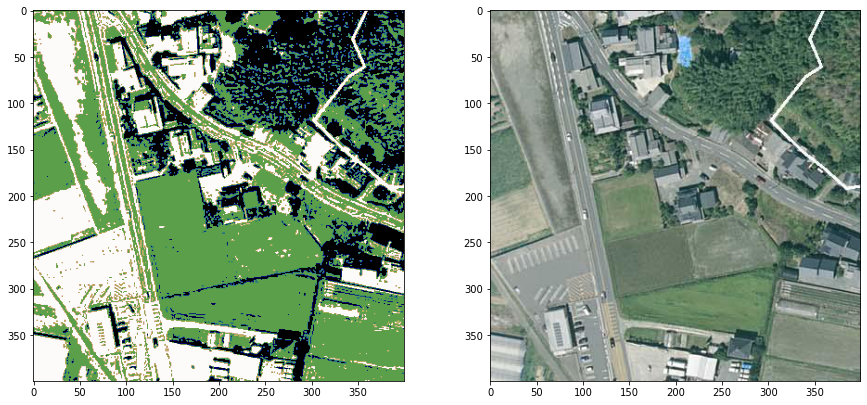

In [59]:
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.imshow(out_data,cmap='gist_earth_r')
plt.subplot(222)
plt.imshow(np.asarray((Image.open(('/content/04347_original.jpg')))))